# SPARKS FOUNDATION TASK -8

TASK 8 - TIMELINE ANALYSIS:COVID19 : TO SHOW THE SPREAD OF COVID19 IN OUR COUNTRY AS WELL AS IN ANY REGION(ASIA, EUROPE) USING VARIOUS GRAPHS AND CHARTS.


Objectives :
    
1) Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc).

2) Use animation, timeline and annotations to create attractive and interactive dashboards and story.

3) Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts


Author - Aryan Tiwari

# IMPORTING THE LIBRARIES

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [12]:
covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [11]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,9.075500e+04,9.075400e+04,89742.000000,8.080000e+04,80958.000000,89742.000000,90270.000000,90269.000000,89262.000000,80328.000000,...,84317.000000,57024.000000,84457.000000,86455.000000,66100.000000,65131.000000,42428.000000,76984.000000,89006.000000,84629.000000
mean,9.626765e+05,6.070950e+03,6087.548852,2.578930e+04,146.815275,127.582558,11822.547480,76.185749,76.422254,256.846455,...,19289.445544,13.379677,258.188384,7.897009,10.543923,32.677983,50.865354,3.028581,73.233186,0.727668
std,6.637267e+06,3.859664e+04,37883.081726,1.539196e+05,1072.423799,723.712719,22175.940203,201.536665,158.658138,448.273983,...,19968.053504,19.951352,118.914731,4.099213,10.430793,13.478431,31.760868,2.460575,7.560770,0.150394
min,1.000000e+00,-3.486670e+05,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-5160.525000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1.114000e+03,2.000000e+00,7.286000,5.000000e+01,0.000000,0.000000,234.346000,0.207000,1.241000,7.626500,...,4466.507000,0.600000,167.295000,5.310000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,1.231200e+04,7.200000e+01,89.286000,3.460000e+02,2.000000,1.286000,1586.567000,8.061000,10.652000,46.910000,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000
75%,1.298900e+05,7.930000e+02,831.821250,3.367250e+03,18.000000,14.143000,11921.134500,70.736000,79.343500,284.726000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000
max,1.728709e+08,1.498126e+06,826389.571000,3.718983e+06,126549.000000,14437.143000,178062.512000,18293.675000,4083.500000,5643.390000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000


In [32]:
covid_data.shape

(93733, 59)

In [33]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93733 entries, 0 to 93732
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               93733 non-null  object 
 1   continent                              89298 non-null  object 
 2   location                               93733 non-null  object 
 3   date                                   93733 non-null  object 
 4   total_cases                            90755 non-null  float64
 5   new_cases                              90754 non-null  float64
 6   new_cases_smoothed                     89742 non-null  float64
 7   total_deaths                           80800 non-null  float64
 8   new_deaths                             80958 non-null  float64
 9   new_deaths_smoothed                    89742 non-null  float64
 10  total_cases_per_million                90270 non-null  float64
 11  ne

In [35]:
covid_data.value_counts

<bound method DataFrame.value_counts of       iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
93728      ZWE    Africa     Zimbabwe  2021-06-01      38998.0       37.0   
93729      ZWE    Africa     Zimbabwe  2021-06-02      39031.0       33.0   
93730      ZWE    Africa     Zimbabwe  2021-06-03      39092.0       61.0   
93731      ZWE    Africa     Zimbabwe  2021-06-04      39144.0       52.0   
93732      ZWE    Africa     Zimbabwe  2021-06-05      39168.0       24.0   

       new_cases_smoothed  total_de

In [36]:
covid_data.isnull().any()

iso_code                                 False
continent                                 True
location                                 False
date                                     False
total_cases                               True
new_cases                                 True
new_cases_smoothed                        True
total_deaths                              True
new_deaths                                True
new_deaths_smoothed                       True
total_cases_per_million                   True
new_cases_per_million                     True
new_cases_smoothed_per_million            True
total_deaths_per_million                  True
new_deaths_per_million                    True
new_deaths_smoothed_per_million           True
reproduction_rate                         True
icu_patients                              True
icu_patients_per_million                  True
hosp_patients                             True
hosp_patients_per_million                 True
weekly_icu_ad

In [13]:
covid_data.nunique()

iso_code                                   229
continent                                    6
location                                   229
date                                       522
total_cases                              49745
new_cases                                12383
new_cases_smoothed                       23815
total_deaths                             18953
new_deaths                                2923
new_deaths_smoothed                       6550
total_cases_per_million                  70428
new_cases_per_million                    39773
new_cases_smoothed_per_million           44927
total_deaths_per_million                 43924
new_deaths_per_million                    7447
new_deaths_smoothed_per_million           8826
reproduction_rate                          367
icu_patients                              2521
icu_patients_per_million                  5383
hosp_patients                             4932
hosp_patients_per_million                 8938
weekly_icu_ad

In [14]:
covid_data.isnull().sum()

iso_code                                     0
continent                                 4435
location                                     0
date                                         0
total_cases                               2978
new_cases                                 2979
new_cases_smoothed                        3991
total_deaths                             12933
new_deaths                               12775
new_deaths_smoothed                       3991
total_cases_per_million                   3463
new_cases_per_million                     3464
new_cases_smoothed_per_million            4471
total_deaths_per_million                 13405
new_deaths_per_million                   13247
new_deaths_smoothed_per_million           4471
reproduction_rate                        18342
icu_patients                             84237
icu_patients_per_million                 84237
hosp_patients                            81941
hosp_patients_per_million                81941
weekly_icu_ad

In [78]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [38]:
covid_data.location.value_counts()[0:100]

Mexico           522
Argentina        522
Thailand         519
Peru             517
Taiwan           507
                ... 
Ukraine          460
Libya            459
Togo             459
Poland           459
Liechtenstein    459
Name: location, Length: 100, dtype: int64

# Analysis of Covid Cases across India:

Collecting India Data from the given dataset:

In [40]:
india_data = covid_data[covid_data['location'] =='India']
india_data = india_data[~india_data['new_cases'].isin(['World','International'])]
india_data.head(100)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38749,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38750,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38751,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38752,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38753,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38844,IND,Asia,India,2020-05-04,46437.0,3932.0,2426.571,1566.0,175.0,89.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38845,IND,Asia,India,2020-05-05,49400.0,2963.0,2582.286,1693.0,127.0,97.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38846,IND,Asia,India,2020-05-06,52987.0,3587.0,2846.429,1785.0,92.0,100.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38847,IND,Asia,India,2020-05-07,56351.0,3364.0,3069.714,1889.0,104.0,105.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [26]:
top_10_india_deaths  = india_data.sort_values("total_deaths", ascending = False)
top_10_india_deaths.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
39241,IND,Asia,India,2021-06-05,28694879.0,0.0,114297.000,344082.0,0.0,2587.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39240,IND,Asia,India,2021-06-04,28694879.0,120529.0,137947.429,344082.0,3380.0,3081.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39239,IND,Asia,India,2021-06-03,28574350.0,132364.0,145556.143,340702.0,2713.0,3115.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39238,IND,Asia,India,2021-06-02,28441986.0,134154.0,153270.429,337989.0,2887.0,3250.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39237,IND,Asia,India,2021-06-01,28307832.0,132788.0,164291.000,335102.0,3207.0,3387.714,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39236,IND,Asia,India,2021-05-31,28175044.0,127510.0,175167.143,331895.0,2795.0,3523.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39235,IND,Asia,India,2021-05-30,28047534.0,152734.0,185012.429,329100.0,3128.0,3625.714,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39234,IND,Asia,India,2021-05-29,27894800.0,165553.0,194952.571,325972.0,3460.0,3815.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39233,IND,Asia,India,2021-05-28,27729247.0,173790.0,205708.143,322512.0,3617.0,3855.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39232,IND,Asia,India,2021-05-27,27555457.0,186364.0,217638.000,318895.0,3660.0,3937.714,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [43]:
top_10_india_deaths  = india_data.sort_values("total_cases", ascending = False)
top_10_india_deaths.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
39241,IND,Asia,India,2021-06-05,28694879.0,0.0,114297.000,344082.0,0.0,2587.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39240,IND,Asia,India,2021-06-04,28694879.0,120529.0,137947.429,344082.0,3380.0,3081.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39239,IND,Asia,India,2021-06-03,28574350.0,132364.0,145556.143,340702.0,2713.0,3115.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39238,IND,Asia,India,2021-06-02,28441986.0,134154.0,153270.429,337989.0,2887.0,3250.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39237,IND,Asia,India,2021-06-01,28307832.0,132788.0,164291.000,335102.0,3207.0,3387.714,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39236,IND,Asia,India,2021-05-31,28175044.0,127510.0,175167.143,331895.0,2795.0,3523.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39235,IND,Asia,India,2021-05-30,28047534.0,152734.0,185012.429,329100.0,3128.0,3625.714,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39234,IND,Asia,India,2021-05-29,27894800.0,165553.0,194952.571,325972.0,3460.0,3815.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39233,IND,Asia,India,2021-05-28,27729247.0,173790.0,205708.143,322512.0,3617.0,3855.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39232,IND,Asia,India,2021-05-27,27555457.0,186364.0,217638.000,318895.0,3660.0,3937.714,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [44]:
top_10_india_deaths  = india_data.sort_values("new_cases", ascending = False)
top_10_india_deaths.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
39211,IND,Asia,India,2021-05-06,21491598.0,414188.0,389803.143,234083.0,3915.0,3679.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39210,IND,Asia,India,2021-05-05,21077410.0,412431.0,385855.571,230168.0,3980.0,3619.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39213,IND,Asia,India,2021-05-08,22296081.0,403405.0,391232.000,242347.0,4077.0,3829.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39205,IND,Asia,India,2021-04-30,19164969.0,401993.0,364926.857,211853.0,3523.0,3187.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39212,IND,Asia,India,2021-05-07,21892676.0,401078.0,389672.429,238270.0,4187.0,3773.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39206,IND,Asia,India,2021-05-01,19557457.0,392488.0,371040.714,215542.0,3689.0,3318.714,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39204,IND,Asia,India,2021-04-29,18762976.0,386555.0,357040.143,208330.0,3498.0,3058.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39209,IND,Asia,India,2021-05-04,20664979.0,382146.0,381123.714,226188.0,3780.0,3571.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39203,IND,Asia,India,2021-04-28,18376421.0,379308.0,349378.143,204832.0,3645.0,2882.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39207,IND,Asia,India,2021-05-02,19925517.0,368060.0,373193.429,218959.0,3417.0,3405.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [45]:
top_10_india_deaths  = india_data.sort_values("new_deaths", ascending = False)
top_10_india_deaths.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
39223,IND,Asia,India,2021-05-18,25496330.0,267334.0,307913.143,283248.0,4529.0,4150.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39228,IND,Asia,India,2021-05-23,26752447.0,222315.0,255283.429,303720.0,4454.0,4190.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39222,IND,Asia,India,2021-05-17,25228996.0,263533.0,319497.000,278719.0,4329.0,4103.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39225,IND,Asia,India,2021-05-20,26031991.0,259551.0,283597.429,291331.0,4209.0,4144.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39216,IND,Asia,India,2021-05-11,23340938.0,348421.0,382279.857,254197.0,4205.0,4001.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39226,IND,Asia,India,2021-05-21,26289290.0,257299.0,273769.000,295525.0,4194.0,4188.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39212,IND,Asia,India,2021-05-07,21892676.0,401078.0,389672.429,238270.0,4187.0,3773.857,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39230,IND,Asia,India,2021-05-25,27157795.0,208921.0,237352.143,311388.0,4157.0,4020.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39217,IND,Asia,India,2021-05-12,23703665.0,362727.0,375179.286,258317.0,4120.0,4021.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39221,IND,Asia,India,2021-05-16,24965463.0,281386.0,328984.000,274390.0,4106.0,4039.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [110]:
df_asia=india_data[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
df_asia.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
38751,2020-02-01,1.0,0.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
38749,2020-01-30,1.0,1.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
38750,2020-01-31,1.0,0.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
38752,2020-02-02,2.0,1.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN
38779,2020-02-29,3.0,0.0,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

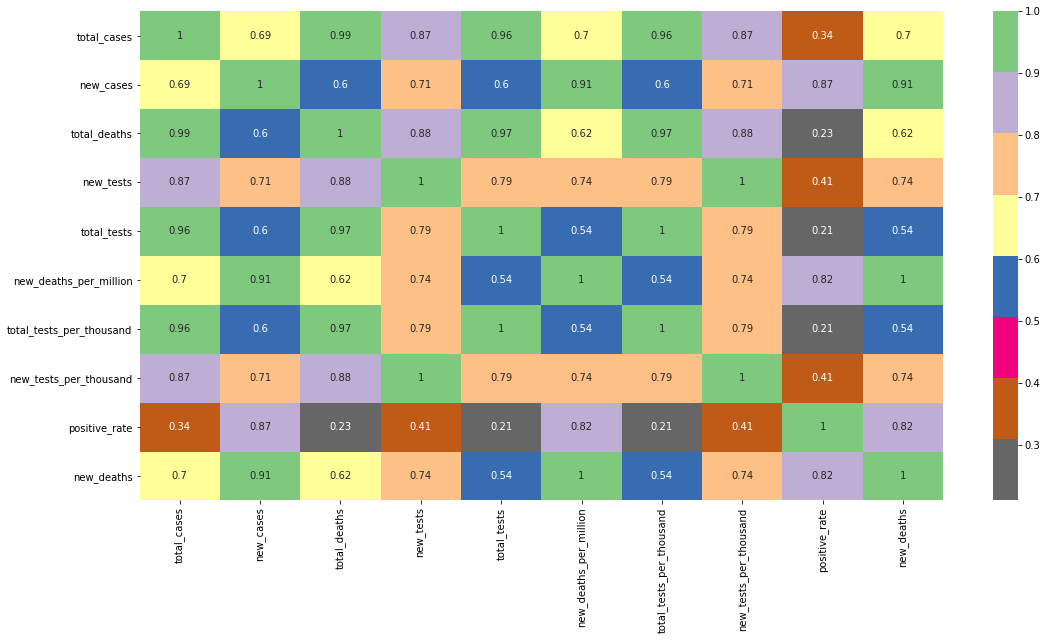

In [74]:
fig=plt.figure(figsize=(18,9))

sns.heatmap(df_asia.corr(),cmap="Accent_r",annot=True)

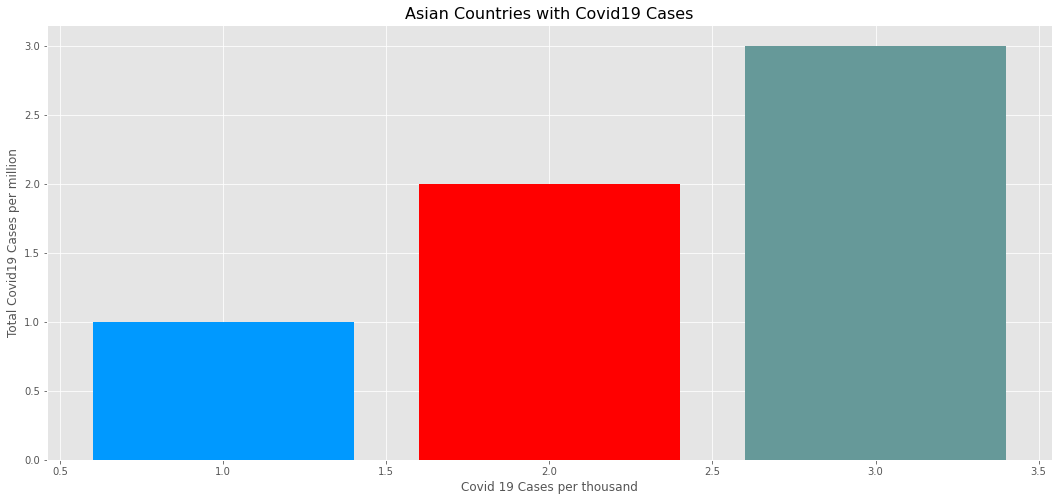

In [114]:
india_data=india_data.sort_values("total_cases",ascending=True)
fig=plt.figure(figsize=(18,8))
plt.bar(india_data["total_cases"][:10],india_data["total_cases"][:10],color=["#ff9900","#ffff00","#0099ff","#ff0000","#99ff33","#9900ff","#ff3399","#cc99ff","#ff9933","#669999"])
plt.xlabel("Covid 19 Cases per thousand")
plt.ylabel("Total Covid19 Cases per million")
plt.style.use("ggplot")
plt.title("Asian Countries with Covid19 Cases",fontsize=16)
plt.show()

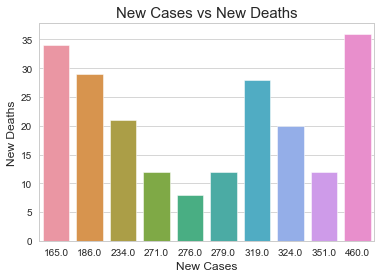

In [144]:
sns.barplot(x="new_cases", y="new_deaths", data=covid_data[120:130])
sns.set_style("whitegrid")
plt.title("New Cases vs New Deaths",fontsize=15)
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.show()


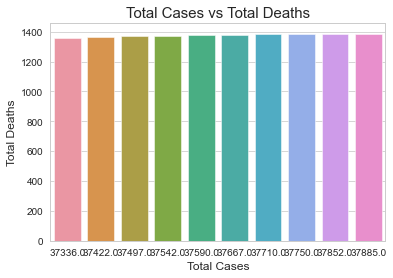

In [150]:
sns.barplot(x="total_cases", y="total_deaths", data=covid_data[170:180])
sns.set_style("whitegrid")
plt.title("Total Cases vs Total Deaths",fontsize=15)
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

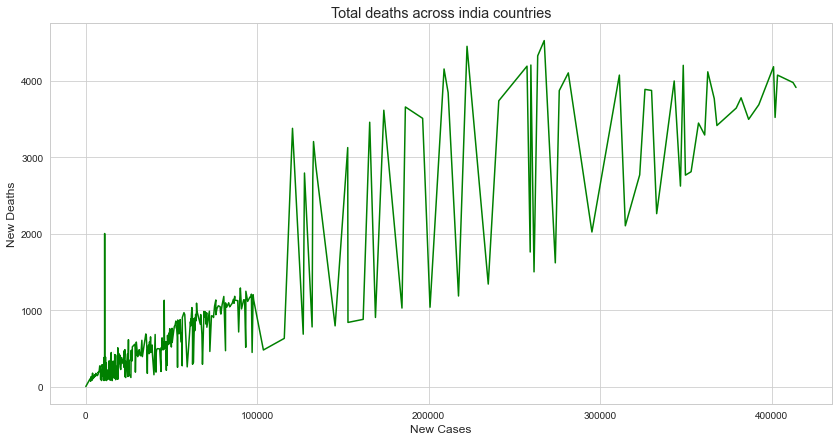

In [155]:
plt.figure(figsize=(14,7))
sns.lineplot(x = 'new_cases',y = 'new_deaths',data = top_10_india_deaths[0:400], color='green')
plt.title("Total deaths across india countries")
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.show()

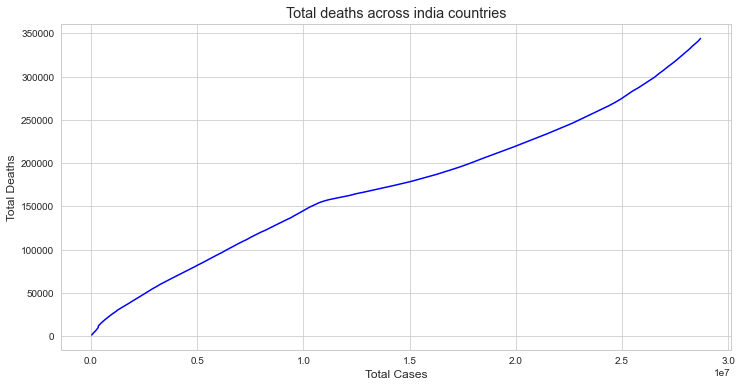

In [159]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'total_cases',y = 'total_deaths',data = top_10_india_deaths[0:400], color='blue')
plt.title("Total deaths across india countries")
plt.xlabel('Total Cases')
plt.ylabel("Total Deaths")
plt.show()

# Conclusions:

India is the most affected Asian country as it has the highest number of deaths.

Total Cases and New Cases are increasing gradually.

Total Deaths and New Deaths are increasing gradually.